In [297]:
import pandas as pd

In [298]:
# Load the dataset
df = pd.read_csv("Delhi.csv")

In [299]:
# Preview first few rows
print(df.head())

      Price  Area          Location  No. of Bedrooms  Resale  \
0  10500000  1200  Sector 10 Dwarka                2       1   
1   6000000  1000       Uttam Nagar                3       0   
2  15000000  1350      Sarita Vihar                2       1   
3   2500000   435       Uttam Nagar                2       0   
4   5800000   900        Dwarka Mor                3       0   

   MaintenanceStaff  Gymnasium  SwimmingPool  LandscapedGardens  JoggingTrack  \
0                 0          1             0                  0             1   
1                 0          0             0                  0             0   
2                 0          0             0                  0             0   
3                 0          0             0                  0             0   
4                 0          0             0                  0             0   

   ...  LiftAvailable  BED  VaastuCompliant  Microwave  GolfCourse  TV  \
0  ...              1    0                1          0

In [300]:
# Check data types and basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                4998 non-null   int64 
 1   Area                 4998 non-null   int64 
 2   Location             4998 non-null   object
 3   No. of Bedrooms      4998 non-null   int64 
 4   Resale               4998 non-null   int64 
 5   MaintenanceStaff     4998 non-null   int64 
 6   Gymnasium            4998 non-null   int64 
 7   SwimmingPool         4998 non-null   int64 
 8   LandscapedGardens    4998 non-null   int64 
 9   JoggingTrack         4998 non-null   int64 
 10  RainWaterHarvesting  4998 non-null   int64 
 11  IndoorGames          4998 non-null   int64 
 12  ShoppingMall         4998 non-null   int64 
 13  Intercom             4998 non-null   int64 
 14  SportsFacility       4998 non-null   int64 
 15  ATM                  4998 non-null   int64 
 16  ClubHo

In [301]:
# Shape of the dataset
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Rows: 4998, Columns: 40


In [302]:
# Check for missing values
missing = df.isnull().sum()
print(missing[missing > 0])  

# For Only show columns with missing values

Series([], dtype: int64)


In [303]:
    # Convert 'Location' to category
df['Location'] = df['Location'].astype('category')

In [304]:
# Ensure binary columns are 0/1 integers
binary_cols = df.columns[5:]  # all amenities are 0/1
df[binary_cols] = df[binary_cols].astype(int)

# Confirm numeric
df[['Price', 'Area', 'No. of Bedrooms']] = df[['Price', 'Area', 'No. of Bedrooms']].apply(pd.to_numeric)

In [305]:
# Remove properties with extremely high or low area or price
df = df[(df['Area'] > 200) & (df['Area'] < 5000)]
df = df[(df['Price'] > 500000) & (df['Price'] < 100000000)]  # ₹5L – ₹10Cr

In [306]:
df.reset_index(drop=True, inplace=True)

In [307]:
import matplotlib.pyplot as plt
import seaborn as sns

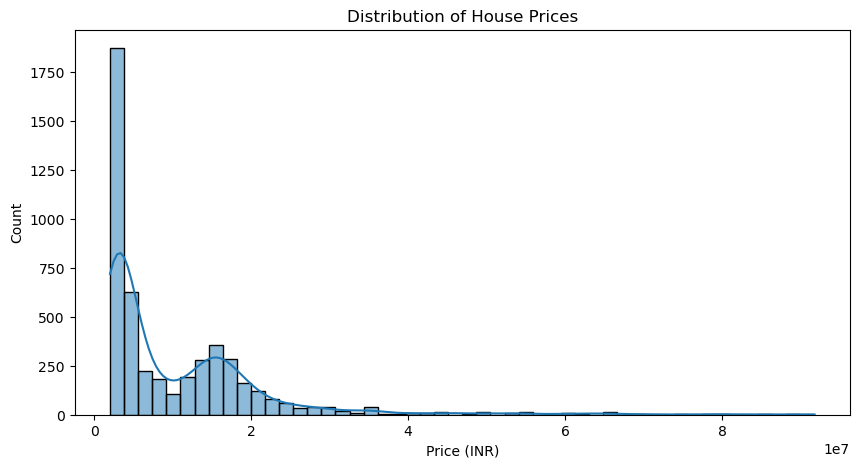

In [308]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price (INR)")
plt.ylabel("Count")
plt.show()

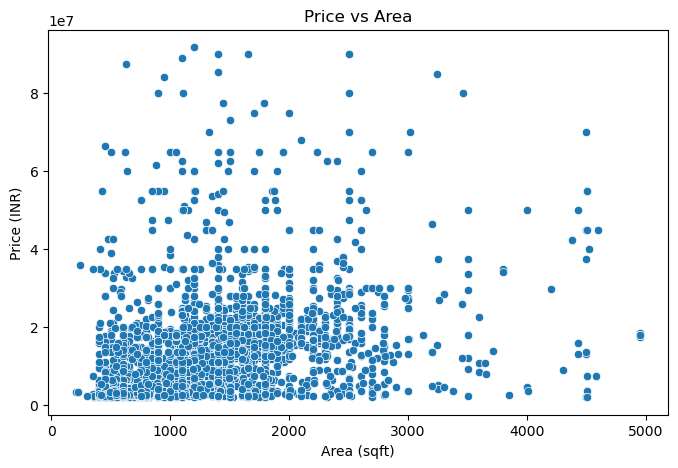

In [309]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Area', y='Price', data=df)
plt.title("Price vs Area")
plt.xlabel("Area (sqft)")
plt.ylabel("Price (INR)")
plt.show()

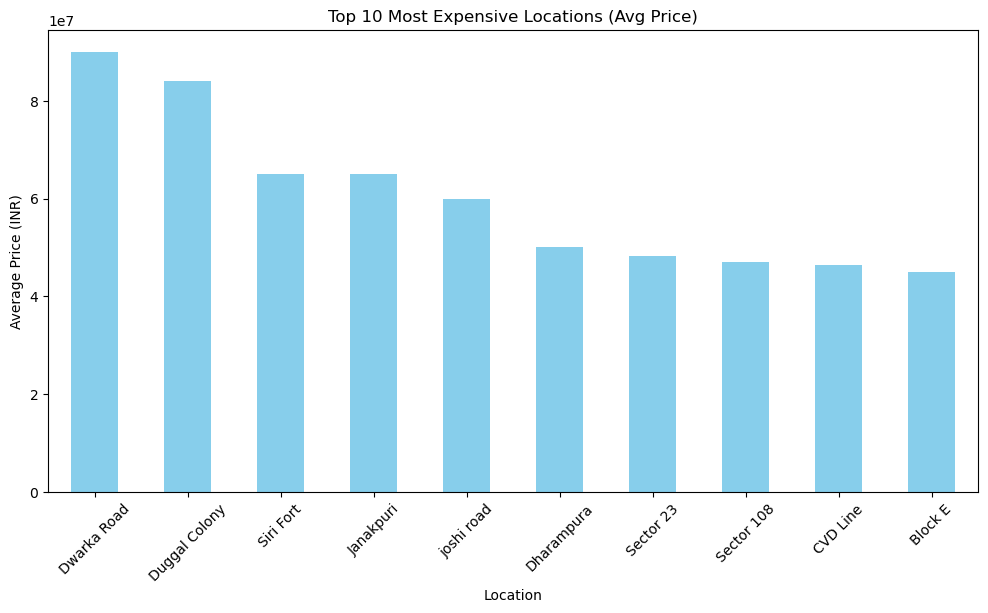

In [310]:
location_price = df.groupby('Location', observed=True)['Price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
location_price.plot(kind='bar', color='skyblue')
plt.title("Top 10 Most Expensive Locations (Avg Price)")
plt.ylabel("Average Price (INR)")
plt.xticks(rotation=45)
plt.show()

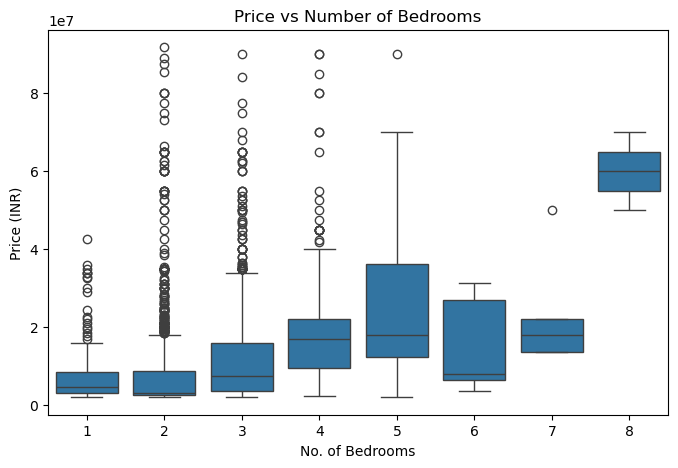

In [311]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='No. of Bedrooms', y='Price', data=df)
plt.title("Price vs Number of Bedrooms")
plt.xlabel("No. of Bedrooms")
plt.ylabel("Price (INR)")
plt.show()

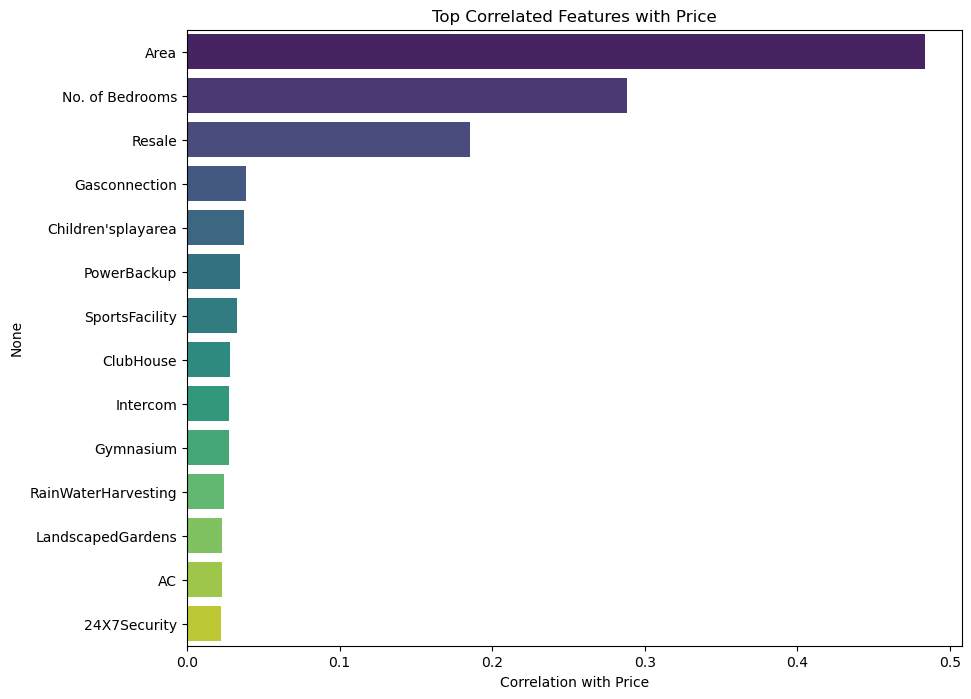

In [312]:
corr = df.corr(numeric_only=True)['Price'].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=corr.values[1:15], y=corr.index[1:15], hue=corr.index[1:15], palette='viridis', dodge=False, legend=False)
plt.title("Top Correlated Features with Price")
plt.xlabel("Correlation with Price")
plt.show()

In [313]:
df.columns

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator'],
      dtype='object')

In [314]:
df = df.copy()

In [315]:
# Check if 'BED' is a duplicate of 'No. of Bedrooms'
if df['BED'].equals(df['No. of Bedrooms']):
    df.drop('BED', axis=1, inplace=True)

In [316]:
# Fix column names (remove apostrophes etc.)
df.rename(columns={"Children'splayarea": 'ChildrensPlayArea', 'No. of Bedrooms': 'Bedrooms'}, inplace=True)

In [317]:
# Convert all amenity columns to 0/1 (if not already)
amenities = df.columns.difference(['Price', 'Area', 'Location', 'Bedrooms'])
for col in amenities:
    df[col] = df[col].fillna(0)  # Treat missing as "not available"
    df[col] = df[col].apply(lambda x: 1 if x == 1 or str(x).lower() in ['yes', 'true'] else 0)

In [318]:
# Drop rows with missing Price or Area
df.dropna(subset=['Price', 'Area'], inplace=True)

In [319]:
# Handle Location - keep top 10 locations only, others as "Other"
top_locations = df['Location'].value_counts().nlargest(10).index
df['Location'] = df['Location'].apply(lambda x: x if x in top_locations else 'Other')

In [320]:
# Optional Feature: Price per sqft
df['PricePerSqft'] = df['Price'] / df['Area']

In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4863 entries, 0 to 4862
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                4863 non-null   int64  
 1   Area                 4863 non-null   int64  
 2   Location             4863 non-null   object 
 3   Bedrooms             4863 non-null   int64  
 4   Resale               4863 non-null   int64  
 5   MaintenanceStaff     4863 non-null   int64  
 6   Gymnasium            4863 non-null   int64  
 7   SwimmingPool         4863 non-null   int64  
 8   LandscapedGardens    4863 non-null   int64  
 9   JoggingTrack         4863 non-null   int64  
 10  RainWaterHarvesting  4863 non-null   int64  
 11  IndoorGames          4863 non-null   int64  
 12  ShoppingMall         4863 non-null   int64  
 13  Intercom             4863 non-null   int64  
 14  SportsFacility       4863 non-null   int64  
 15  ATM                  4863 non-null   i

In [322]:
df.head()

,Price,Area,Location,Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,PricePerSqft
0,10500000,1200,Sector 10 Dwarka,2,1,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,8750.000000
1,6000000,1000,Uttam Nagar,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6000.000000
2,15000000,1350,Other,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11111.111111
3,2500000,435,Uttam Nagar,2,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,5747.126437
4,5800000,900,Dwarka Mor,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6444.444444


In [323]:
df_model = df.drop(columns=['PricePerSqft'])  # keep Price and Area for modeling

In [324]:
df_encoded = pd.get_dummies(df_model, columns=['Location'], drop_first=True)

In [325]:
X = df_encoded.drop(columns=['Price'])
y = df_encoded['Price']

In [326]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [327]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [328]:
y_pred = lr.predict(X_test)

In [329]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression:")
print(f"MAE = {mae:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R2 Score = {r2:.4f}")

Linear Regression:
MAE = 4757154.04
RMSE = 8708937.26
R2 Score = 0.3205


In [330]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [331]:
# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor:")
print(f"MAE = {mae_rf:.2f}")
print(f"RMSE = {rmse_rf:.2f}")
print(f"R2 Score = {r2_rf:.4f}")

Random Forest Regressor:
MAE = 4576650.49
RMSE = 9144776.12
R2 Score = 0.2508


## Interpretation:
Random Forest gives slightly better MAE (average error), meaning it’s a bit better at predicting closer to true values overall.

However, Linear Regression has better RMSE and R², indicating it models the overall structure slightly better.

This tells us: no model is currently very strong, meaning more improvement is needed from feature engineering, tuning, or better encoding.



In [333]:
# Get feature importances
importances = rf_model.feature_importances_
features = X_train.columns

In [334]:
# Create DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

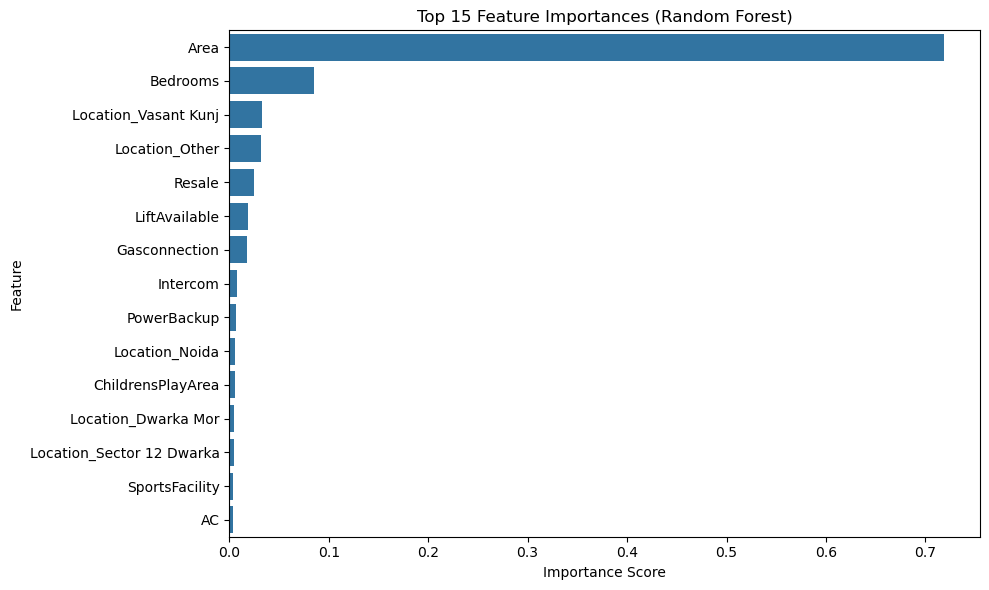

In [335]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df.head(15), x='Importance', y='Feature')
plt.title('Top 15 Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [336]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [337]:
# Version A: On original target
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [338]:
# Choose appropriate y_pred based on version
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("XGBoost Regressor Performance:")
print(f"MAE = {mae:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R2 Score = {r2:.4f}")

XGBoost Regressor Performance:
MAE = 4757154.04
RMSE = 8708937.26
R2 Score = 0.3205


## Insights:
Same performance as Linear Regression, which means XGBoost didn't provide an improvement here.

Worse than Random Forest, which gave an R² of 0.2508, but a slightly lower MAE (4.57M vs 4.75M).

### This suggests:

Overfitting is not a major concern, since tree-based and linear models both have similar performance.

Dataset may lack important features that can better explain price variance.

In [340]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# Train on full data
final_model = XGBRegressor()
final_model.fit(X, y)  # X and y should be the processed features and target (Price)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [341]:
import joblib

# Save model to file
joblib.dump(final_model, 'house_price_estimator_xgb.pkl')

['house_price_estimator_xgb.pkl']

In [342]:
import pandas as pd
import numpy as np

In [343]:
def predict_price(input_dict):
    """
    input_dict: dict containing features like Area, Location, etc.
    Returns: predicted price
    """
    # Create DataFrame with one row
    input_df = pd.DataFrame([input_dict])

    # Perform same preprocessing as training
    # (One-hot encode, fill missing values, etc.)
    # This must match exactly your previous pipeline

    # Align input columns with X
    input_df = input_df.reindex(columns=X.columns, fill_value=0)

    # Load model
    model = joblib.load('house_price_estimator_xgb.pkl')

    # Predict
    prediction = model.predict(input_df)[0]
    return round(prediction)

In [344]:
sample_input = {
    'Area': 600,
    'Location_Dwarka': 0,
    'No. of Bedrooms': 5,
    'Gymnasium': 1,
    'LiftAvailable': 0,
}

print("Estimated Price: ₹", predict_price(sample_input))

Estimated Price: ₹ 4455678


In [345]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define evaluation function
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    return {'Model': name, 'MAE': mae, 'RMSE': rmse, 'R2 Score': r2}

# Train models
models = [
    (LinearRegression(), 'Linear Regression'),
    (RandomForestRegressor(random_state=42), 'Random Forest'),
    (XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42), 'XGBoost')
]

# Evaluate all models
results = [evaluate_model(m, name) for m, name in models]

# Create DataFrame
comparison_df = pd.DataFrame(results)
comparison_df[['MAE', 'RMSE', 'R2 Score']] = comparison_df[['MAE', 'RMSE', 'R2 Score']].round(2)
comparison_df


,Model,MAE,RMSE,R2 Score
0,Linear Regression,4757154.04,8708937.26,0.32
1,Random Forest,4576650.49,9144776.12,0.25
2,XGBoost,4356247.60,8604794.41,0.34


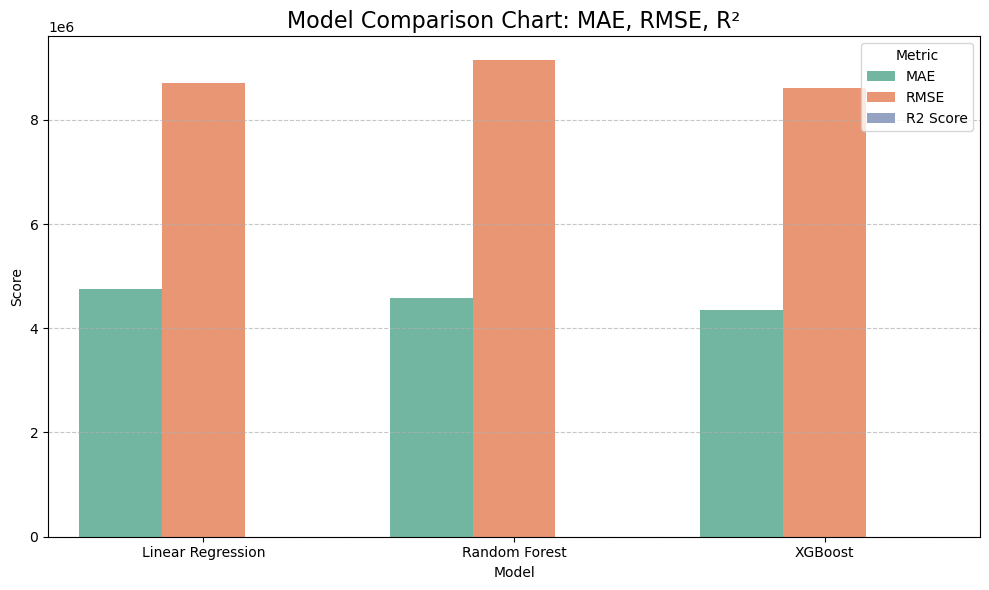

In [346]:
# Melt for grouped bar chart
melted_df = comparison_df.melt(id_vars='Model', value_vars=['MAE', 'RMSE', 'R2 Score'], 
                               var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=melted_df, palette='Set2')

plt.title("Model Comparison Chart: MAE, RMSE, R²", fontsize=16)
plt.xlabel("Model")
plt.ylabel("Score")
plt.legend(title='Metric')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

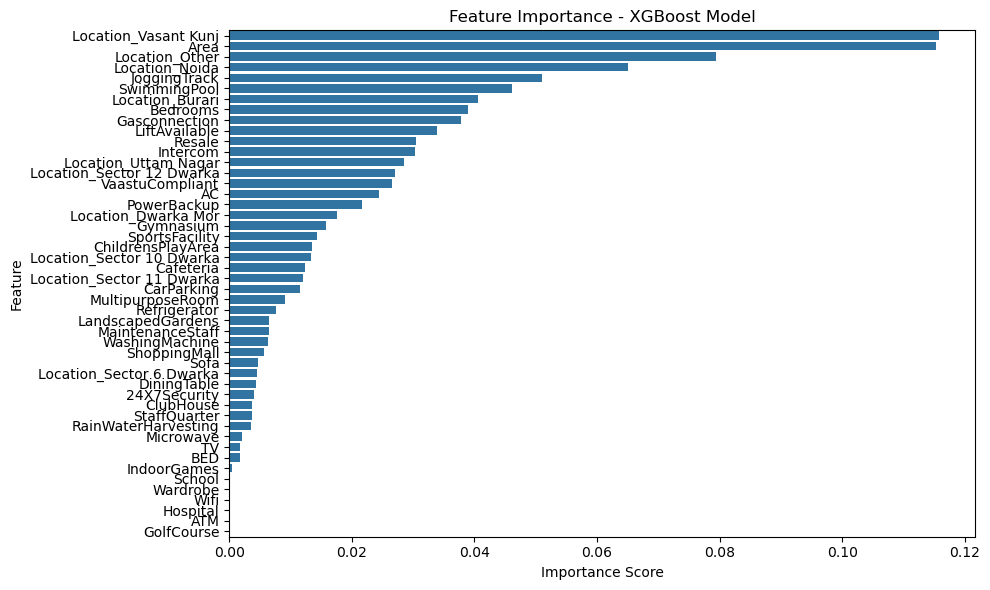

In [347]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor

# 1. Train XGBoost model (assuming you've already split your data)
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# 2. Get feature importances
importances = xgb_model.feature_importances_
features = X_train.columns

# 3. Create a DataFrame
feat_imp_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 4. Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title('Feature Importance - XGBoost Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
